In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
train= pd.read_csv("./train/train.csv")
test= pd.read_csv("./test/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [6]:
#y_train = train["label"].values
#X_train = train.drop(labels = ["label"],axis = 1).values 

In [7]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# Normalize the data
#X_train = X_train / 255.0
#test = test / 255.0

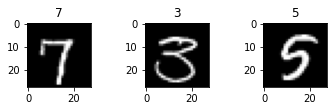

In [11]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [12]:
#
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [13]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [14]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [15]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28 , 1).astype('float32')

In [17]:
X_train.shape

(37800, 28, 28, 1)

In [18]:
y_train.shape

(37800, 10)

In [19]:
X_test.shape

(4200, 28, 28, 1)

In [20]:
y_test.shape

(4200, 10)

In [21]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
image_size

28

In [22]:
### TensorFlow Syntax
import tensorflow as tf

In [23]:
### Initialising the CNN

In [24]:
cnn = tf.keras.models.Sequential()

In [25]:
### step 1 -convolution

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=100, kernel_size=3, activation='relu', input_shape = (image_size,image_size,1)))

In [27]:
### Step 2 -Pooling

In [28]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # maximum pixcel

In [29]:
### Adding a second convolutional layer

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [31]:
### Step 3 - Flattening

In [32]:
cnn.add(tf.keras.layers.Flatten())  #vector of features

In [33]:
### Step 4 - Full Connection

In [34]:
cnn.add(tf.keras.layers.Dense(units=500, activation='relu')) # add our fully connected hidden layer

In [35]:
# add dropout layer
cnn.add(tf.keras.layers.Dropout(0.5))

In [36]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax')) # add the output layer 


In [37]:
### Compiling the CNN

In [38]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [39]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 100)       1000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        28832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               400500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [40]:
### Training the CNN on the Training set and evaluating it on the Test set


In [41]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1182/1182 [==============================] - 57s 48ms/step - loss: 0.3635 - accuracy: 0.9197
Epoch 2/20
1182/1182 [==============================] - 61s 52ms/step - loss: 0.1105 - accuracy: 0.9671
Epoch 3/20
1182/1182 [==============================] - 65s 55ms/step - loss: 0.0878 - accuracy: 0.9739
Epoch 4/20
1182/1182 [==============================] - 67s 57ms/step - loss: 0.0798 - accuracy: 0.9760
Epoch 5/20
1182/1182 [==============================] - 66s 56ms/step - loss: 0.0645 - accuracy: 0.9811
Epoch 6/20
1182/1182 [==============================] - 72s 61ms/step - loss: 0.0652 - accuracy: 0.9810
Epoch 7/20
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0558 - accuracy: 0.9838
Epoch 8/20
1182/1182 [==============================] - 70s 59ms/step - loss: 0.0482 - accuracy: 0.98570s - loss: 0.047
Epoch 9/20
1182/1182 [==============================] - 69s 59ms/step - loss: 0.0495 - accuracy: 0.9856
Epoch 10/20
1182/1182 [=========================

In [63]:
# predict results
pred = cnn.predict(X_test)

# select the indix with the maximum probability
pred = np.argmax(pred,axis = 1)

pred = pd.Series(pred,name="Label")

In [64]:
pred

0       8
1       1
2       9
3       9
4       8
       ..
4195    4
4196    2
4197    7
4198    7
4199    5
Name: Label, Length: 4200, dtype: int64

In [65]:
results = pd.concat([pd.DataFrame(y_test),pred],axis = 1)

results.to_csv("cnn_digit_predict.csv",index=False)

In [66]:
results

,0,1,2,3,4,5,6,7,8,9,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...
4195,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
4196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


In [67]:
pd.DataFrame(y_test)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4195,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
